## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results,mouse_metadata, on="Mouse ID", how= "left")
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [2]:
# Checking the number of mice in the DataFrame.
study_results["Mouse ID"].count()

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data= merge_df.loc[merge_df[["Mouse ID","Timepoint"]].duplicated(),"Mouse ID"].unique()
duplicate_data

array(['g989'], dtype=object)

In [5]:
# Optiduplicated_mice = duplicate_data.tolist()
duplicated_mice = duplicate_data.tolist()
for x in duplicated_mice:
    duplicated_mice_info = merge_df.loc[merge_df["Mouse ID"]==x]
duplicated_mice_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_df[merge_df["Mouse ID"].isin(duplicated_mice) == False]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].count()

1880

In [8]:
clean_data_sort = clean_data.sort_values(["Tumor Volume (mm3)"], ascending=True)

clean_data_sort.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
809,k403,45,22.050126,1,Ramicane,Male,21,16
1392,s185,45,23.343598,1,Capomulin,Female,3,17
808,k403,40,24.365505,1,Ramicane,Male,21,16
1391,s185,40,25.472143,1,Capomulin,Female,3,17
807,k403,35,26.546993,1,Ramicane,Male,21,16


In [11]:
data_points = clean_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_statistics = clean_data_sort.groupby(['Drug Regimen'])
summary_statistics

regimen_mean = summary_statistics["Tumor Volume (mm3)"].mean()


regimen_median = summary_statistics["Tumor Volume (mm3)"].median()


regimen_variance = summary_statistics["Tumor Volume (mm3)"].var()


regimen_std = summary_statistics["Tumor Volume (mm3)"].std()


regimen_sem = summary_statistics["Tumor Volume (mm3)"].sem()

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
statistics_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

statistics_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

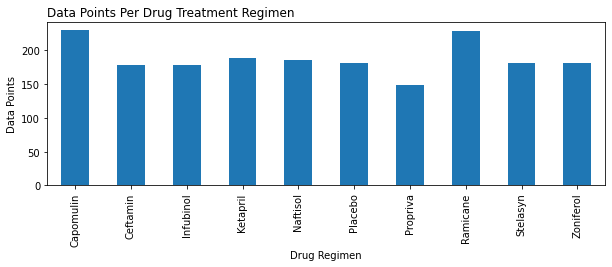

In [16]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
data_points.plot(kind="bar", figsize=(10,3))

plt.title("Data Points Per Drug Treatment Regimen",loc="left")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()


Text(0, 0.5, 'Data Points')

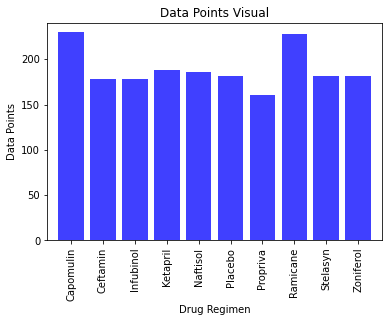

In [18]:
import numpy as np

# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#Create an arraw with the datapoints
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(data_points))

plt.bar(x_axis, users, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Data Points Visual")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

## Pie Plots

In [19]:

gender = clean_data.groupby(["Mouse ID","Sex"])
gender

gender_df = pd.DataFrame(gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


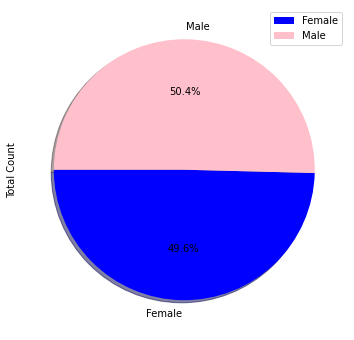

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['blue', 'pink']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(6,6), colors = colors, startangle=180, shadow = True, autopct="%1.1f%%")

(-1.1000791940320744,
 1.1016630746735625,
 -1.1017685314144796,
 1.1009347297692742)

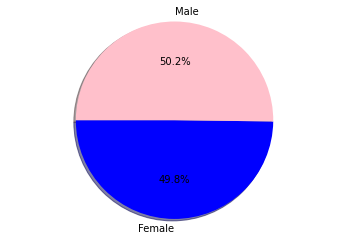

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['blue', 'pink']


#Create the pie chart based upon the values 
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=180)

#Set equal axis
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
promising_regimens = clean_data[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
promising_regimens = promising_regimens.sort_values(["Timepoint"], ascending=True)
promising_regimens

promising_regimens_df = promising_regimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

promising_regimens_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Infubinol,a203,0,45.000000
207,Capomulin,b742,0,45.000000
1578,Infubinol,v766,0,45.000000
1251,Ramicane,q597,0,45.000000
191,Ceftamin,b487,0,45.000000
...,...,...,...,...
1339,Ramicane,r811,45,37.225650
433,Infubinol,e476,45,62.435404
1749,Ceftamin,x581,45,64.634949
1021,Capomulin,m957,45,33.329098


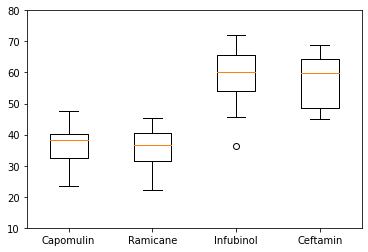

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

promising_regimens_sort = promising_regimens.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
promising_regimens_sort.head()

# Turn retrieved data into dataframe to easily manipulate
pregimens_df = promising_regimens_sort.to_frame()
pregimens_df

#Create a list to use as labels and dataframe
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_df = pregimens_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_volume = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_volume, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

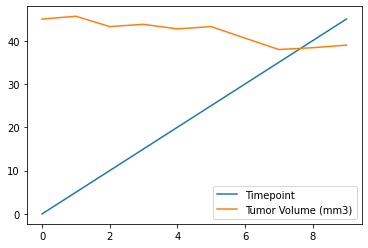

In [37]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_tumer = clean_data[clean_data["Mouse ID"].isin(["b128"])]
time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data

plot_df = time_vs_tumer_data.reset_index()
plot_df

plot_final = plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
plot_final

lines = plot_final.plot.line()

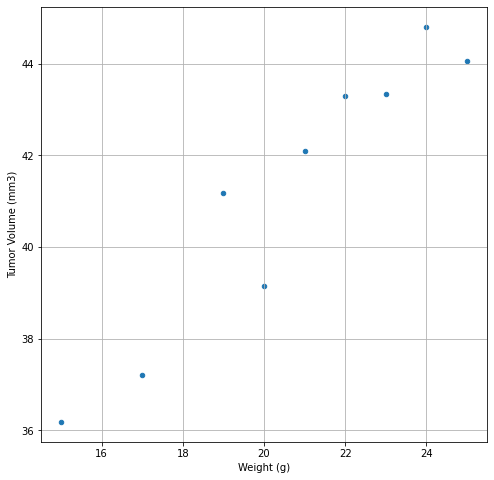

In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

weight_vs_avr = clean_data[clean_data["Drug Regimen"].isin(["Capomulin"])]

weight_vs_avr_df = promising_regimens[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

scatter_plot = weight_vs_avr.reset_index()

weight_sorted = scatter_plot.sort_values(["Weight (g)"], ascending=True)



grouped_weight = scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

grouped_plot = pd.DataFrame(grouped_weight).reset_index()



weight_vs_avr = grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))


## Correlation and Regression

In [54]:

# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]

capavg = cap_df.groupby(['Mouse ID']).mean()
capavg

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


In [56]:
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [57]:
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712645e-07, stderr=0.1275435903320134)

In [58]:
slope= 0.9544396890241045
intercept= 21.552160532685015

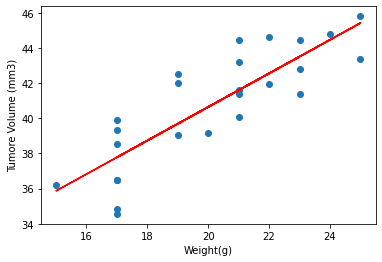

In [60]:

y_values = capavg['Weight (g)']*slope+intercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()